In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [4]:
df = pd.read_csv('https://raw.githubusercontent.com/pedroharaujo/ICD_Docencia/master/close_novas.csv')
df.head()

,Distance (million parsecs),Speed (parsecs/year)
0,117.305042,0.008734
1,217.006920,0.015342
2,230.960787,0.016226
3,85.285262,0.005281
4,185.051202,0.012947


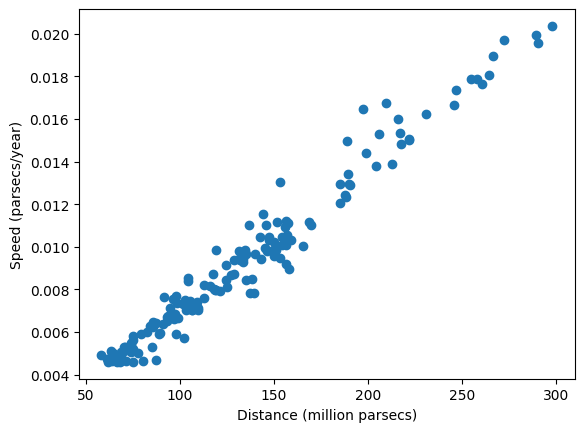

In [5]:
# Create the plot
plt.scatter(df['Distance (million parsecs)'], df['Speed (parsecs/year)'])

# Add labels and a title
plt.xlabel("Distance (million parsecs)")
plt.ylabel("Speed (parsecs/year)")

# Display the plot
plt.show()

In [ ]:
# monta a matriz X
col1 = np.ones(df['Distance (million parsecs)'].shape[0])
col2 = (df['Distance (million parsecs)'].values - df['Distance (million parsecs)'].mean()) / df['Distance (million parsecs)'].std()
X = np.column_stack((col1, col2))

# monta a matrix y
y = (df['Speed (parsecs/year)'] - df['Speed (parsecs/year)'].mean()) / df['Speed (parsecs/year)'].std()

0     -0.159001
1      1.539466
2      1.766637
3     -1.046333
4      0.924062
         ...   
151    2.062706
152    2.628524
153    1.041147
154    2.468699
155    2.831523
Name: Speed (parsecs/year), Length: 156, dtype: float64

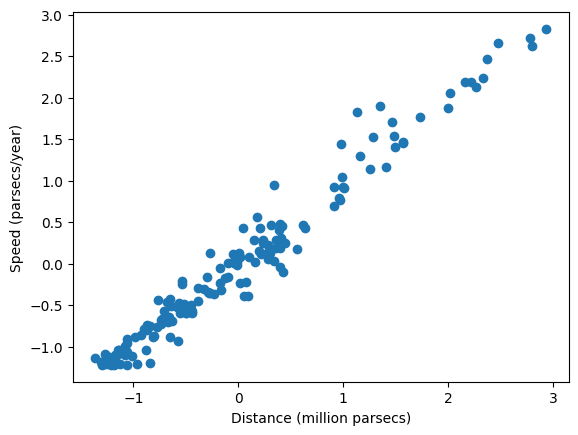

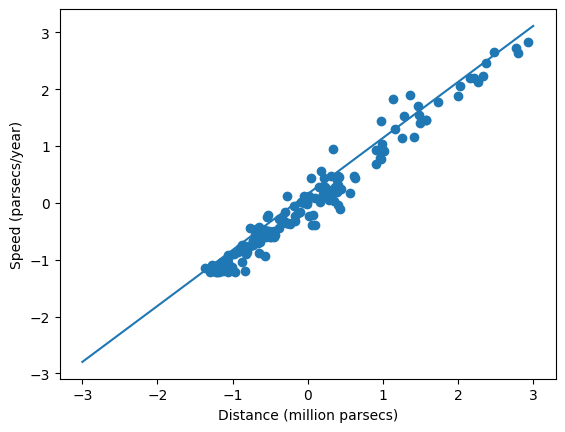

In [ ]:
def predict(theta, X):
  return X @ theta

def derivadas_regressao_media(theta, X, y):
  return -2 * ((y - X @ theta) @ X) / len(y)

def gd(X, y, lambda_=0.0001, tol=0.00001, max_iter=10000):
  n = X.shape[0]
  f = X.shape[1]

  theta = np.ones(f)
  old_err_sq = np.inf

  i = 0
  while True:
    # Computar as derivadas
    grad = derivadas_regressao_media(theta, X, y)
    # Atualizar
    theta_novo = theta - lambda_ * grad

    # Parar quando o erro convergir
    err_sq = ((X.dot(theta) - y) ** 2).mean()
    if np.abs(old_err_sq - err_sq) <= tol:
      break
    theta = theta_novo
    old_err_sq = err_sq
    #print('Iter {}; theta = '.format(i+1), theta)
    i += 1
    if i == max_iter:
      break

  return theta

theta = gd(X, y)
x_grid = np.linspace(start = -3, stop = 3, num = 1000)
col1 = np.ones(len(x_grid))
col2 = x_grid
X_grid_test = np.column_stack((col1, col2))

# Create the plot
plt.scatter(X[:,1], y)
plt.plot(x_grid, predict(theta, X_grid_test))

# Add labels and a title
plt.xlabel("Distance (million parsecs)")
plt.ylabel("Speed (parsecs/year)")

# Display the plot
plt.show()

[6.05729262e-04 6.97448102e-05]
[6.05729262e-04 6.97448102e-05]


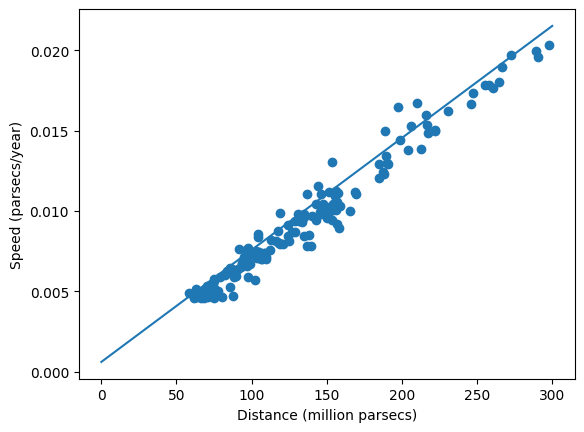

In [39]:

# monta a matriz X original
col1 = np.ones(df['Distance (million parsecs)'].shape[0])
col2 = df['Distance (million parsecs)'].values
X = np.column_stack((col1, col2))

# monta a matrix y original
y = df['Speed (parsecs/year)']

# plota com os dados originais
n = X.shape[0]
f = X.shape[1]

orig_theta = theta
for idx, coeff in enumerate(theta):
    if idx == 0:
        # coeficiente linear, faz depois
        continue

    orig_theta[idx] = coeff * y.std() / X[:,idx].std()

# corrige o linear
sum_others = 0

for j in range(1, f):
    sum_others += orig_theta[j] * X[:,j].mean()
    
orig_theta[0] = y.mean() + y.std() * theta[0] - sum_others

print(theta)
print(orig_theta)
        
x_grid = np.linspace(start = 0, stop = 300, num = 1000)
col1 = np.ones(len(x_grid))
col2 = x_grid
X_grid_test = np.column_stack((col1, col2))

# Create the plot
plt.scatter(df['Distance (million parsecs)'], df['Speed (parsecs/year)'])
plt.plot(x_grid, predict(orig_theta, X_grid_test))

# Add labels and a title
plt.xlabel("Distance (million parsecs)")
plt.ylabel("Speed (parsecs/year)")

# Display the plot
plt.show()